# Introduction to Libraries in Python
### Python for Data Science & Analysis

## What are the key data science libaries?

Anaconda includes `python` and all of the following libraries. 

NumPy, Numerical Python: provides fast numerical arrays. 

Exercise: load the numpy library with the typical alias:

In [1]:
#Solution
import numpy as np

Pandas: fast tables, based on numpy.

Exercise: load the pandas library with the typical alias:

In [2]:
#Solution
import pandas as pd

Seaborn: Simple visualization library.

Exercise: load the seaborn library with the typical alias:

In [3]:
#Solution
import seaborn as sns

Matplotlib: more customizable visulization library (seaborn uses this). 

Exercise: load the matplotlib.pyplot library with the typical alias:

In [4]:
#Solution
import matplotlib.pyplot as plt

Sci-Kit Learn: simple machine learning library.

Exercise: load the sklearn library with the typical alias:

In [5]:
#Solution
import sklearn as sk

Tensorflow: a library for running mathematical functions and tracking a gradient as you do so. This is mostly used for neural networks. 

(Aside: ie., it keeps track of how the loss changes, for almost any (complex) mathematical function). 

Exercise: load the tensorflow library with the typical alias:

In [6]:
#Solution
import tensorflow as tf

NetworkX: (Social) Network Analysis

Exercise: load the networkx library with the typical alias:

In [7]:
#Solution
import networkx as nx

## How do I install a python package? 

* package = unified libraries

Exercise: install networkx. You should see that this is already installed (Requirement already satisfied).

In [8]:
#Solution
!pip install networkx


[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Why do you need to use libraries?

eg., NumPy provies "fast arrays"... why not just use lists?

Python is **very** slow. So any syntax (keywords, data structures, etc.) are **slow**. 

How can NumPy be faster? Isn't numpy written in python? **NO!!**

Almost all the code data scientists (, analysts) are using is not written in python. 

Exercise: repeat the example from the slides for yourself:

In [9]:
np.random.normal(0, 5, 10)

array([-0.11925175,  7.36898814,  8.93214173,  0.4227366 , -7.30693791,
        2.01778611, -8.71734149, -1.75316293, -0.38634429, -7.97387441])

In [10]:
x = np.random.normal(0, 5, 10)
x.mean()

-0.3097504071008172

The `normal` function, and the `mean` function are written in either `FORTRAN` or `C` -- different languages which are much (, much) faster. 

You use a python name, eg., `x.mean`, but actually (compiled) `FORTRAN` code is being run. 

In [11]:
%%timeit

x = np.random.normal(0, 5, 10_000) # <- happening elsewhere
x.mean()# not python! 

308 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Exercise: 
1) Import the random and statistics packages.

2) Create an empty list named x. Hint: use square brackets to creat a list in python.

3) Use a for loop 10000 times with these lines of code:

randNum = 5\*random.random()

x.append(randNum)

4) Explain what the loop creates.

5) Use statistics.mean() with the list as the argument to calculate the mean of your random numbers.

6) Use %%timeit at the start of your code (ensure your previous answers in this exercise are in the same code block)

7) Which was faster and by how much? C/Fortran: NumPy; or Python: random and statistics.

In [13]:
%%timeit 

import random # written in python
import statistics # written in python

# list <- python data structure
x = []

# for keyword <- python loop
for i in range(10_000):
    # .append
    randNum = 5*random.random() #Generates a random number with a mean of 0 and a standard deviation of 1, then multiplies by 5.
    x.append( randNum ) # using python code to create a list of all the random numbers. As the loop continues they are appended to the list
    
statistics.mean(x) # using python code

12.4 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#Solution

Python is >30x slower

In [14]:
#Solution
7.64 / 0.242

31.570247933884296

However, note that the numpy code is likely to be the fastest you can possibly write (ie., its unlikely you will write faster in any other language). 

## How do the libraries work together?

* NumPy 
    * arrays
* Pandas
    * tables (, data files, ...)
* Seaborn
    * visualization
* Sklearn
    * machine learning

### 1. We use Pandas to Load a Dataset into a Table

`read_csv` loads a csv file into a *DataFrame* (aka. a table). 

Exercise:

1) Use pd.readcsv() with the relative filepath as a string (in quotes) for the loan_train.csv file. Save this as loan.

2) Use len() to calculate the length of loan (The number of rows).


In [15]:
#Solution
loan = pd.read_csv('datasets/loan_data.csv')

len(loan)

856

### 2. Use Pandas to Explore & Prepare Data

* Look at samples
* Removing missing data

Exercise:

1) Use the dataframe method dropna() to remove rows that contain an 'NA' (used when the data is not available). Save this as loan (This will write over your original dataframe, but your csv will remain untouched since the dataframe is a copy).

Hint: loan.dropna()

2) Use the dataframe method sample() with an appropriate number as an argument to view a sample of the rows in your dataframe.

In [16]:
#Solution
loan = loan.dropna()
loan.sample(2)

,ID,Income,Term,Balance,Debt,Score,Default
57,296,21200.0,Short Term,1020.0,984.0,250.0,False
409,403,25700.0,Long Term,1110.0,964.0,330.0,False


### 3. Choose Learning Columns & Extract as Fast NumPy arrays from Table

Exercise:

1) Run the below code and explain what it accomplishes

In [17]:
data = loan[['Balance', 'Income']].to_numpy()

x = data[:, 0:1]
y = data[:, 1]

In [18]:
#Solution
x

array([[1460.],
       [ 890.],
       [ 880.],
       [1260.],
       [1540.],
       [1200.],
       [1470.],
       [ 720.],
       [1130.],
       [ 910.],
       [ 820.],
       [1300.],
       [1060.],
       [ 970.],
       [ 610.],
       [1020.],
       [ 940.],
       [1140.],
       [ 810.],
       [1030.],
       [1260.],
       [ 730.],
       [ 780.],
       [1480.],
       [1090.],
       [1260.],
       [ 630.],
       [ 800.],
       [ 950.],
       [ 940.],
       [1060.],
       [ 730.],
       [1220.],
       [1060.],
       [ 800.],
       [ 800.],
       [ 580.],
       [ 880.],
       [ 940.],
       [1640.],
       [1110.],
       [ 920.],
       [ 920.],
       [ 900.],
       [ 640.],
       [1360.],
       [ 830.],
       [ 860.],
       [ 520.],
       [1220.],
       [ 640.],
       [1360.],
       [1040.],
       [1080.],
       [1020.],
       [1070.],
       [1200.],
       [1070.],
       [1180.],
       [ 900.],
       [ 820.],
       [ 870.],
       [

### 4. Use Seaborn to Inspect

Exercise:

1) Use scatterplot(x[:,0],y) from the seaborn package.

Hint: Don't forget to use the seaborn alias to access this function!

2) What variables are on each of the axes?

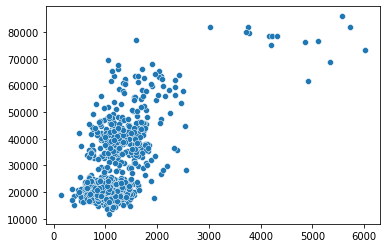

In [20]:
sns.scatterplot(x=x[:, 0], y=y);

### 5. Use sklearn with NumPy arrays to learn (statistical) model

#### Choose model (eg., LinearRegression)

Exercise:

1) Run the below line of code to import LinearRegression from the Sci-Kit Learn package.#

2) Use LinearRegression().fit(x,y) and save this as model



In [21]:
from sklearn.linear_model import LinearRegression

#### Fit model on data (ie., "Learn")

In [ ]:
#Solution
model = LinearRegression().fit(x, y)

#### Logical Inspection of Model

The parameters of the model are, for linear regression, given in `coef_` and `intercept_`... Traditionally lines can be given in the form y = mx + c, where m is the coefficient of x and tells us the gradient of the line, and c is a constant term and tells us the intercept point between the line and the vertical axis when x is zero.

Exercise:

1) Use model.coef_ to find the gradient of the straight line model.

2) Find the vertical intercept.

3) Write out the equation of the line.

In [ ]:
#Solution
model.coef_

In [ ]:
#Solution
model.intercept_

#Solution

$f(x) = 1.06x + 1181968 = ax + b$

#### Visual Inspection of Model

Exercise:

1) Run the below line of code to calculate yhat. This is the y values that the equation of the line gives for the x values we have.

In [ ]:
yhat = model.predict(x)

In [ ]:
sns.scatterplot(x[:, 0], y)
sns.lineplot(x[:, 0], yhat, color="red")

#### Evaluate Model

In [ ]:
model.score(x, y)

## Extension

Start to create your own NumPy cheat sheet:

* Using the NumPy user guide: https://numpy.org/doc/stable/numpy-user.pdf
* Read Chapter 3 to start populating your cheat sheet: include Array methods (functions), Matrix methods, and Mathematical functions. Include a short description/summary to help you use them later.
* Full NumPy documentation is available here: https://numpy.org/doc/stable/numpy-ref.pdf